In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functionsS

In [23]:
rand_state = 1000

In [24]:
df = pd.read_csv('credit_card_clean.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


1. We don't need to scale the features in logistic regression because the coefficients are estimated using the maximum liklihoood estimation. 

## Preproccessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

There are no null values in any of the columns so we will ensure the datatypes are what we need. I will do this by checking the unique values in each column. 

In [26]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

Sex, Education, and Marriage should be categorical. Specifically Education should be ordinal. Age could be categorical if we were interested in seeing what age ranges default more or less. Such as young, middle, and old. 

In [27]:
categorical = ['SEX','EDUCATION','MARRIAGE']

for col in categorical:
    df[col] = df[col].astype('category')

Defining the target variable and doing some EDA on it.

In [28]:
target_variable = 'DEFAULT'

pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


It appears the target variable is relatively  imbalanced. The proportions of non default are 77% of the data.

In [29]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_male,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,MARRIAGE_other,MARRIAGE_single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,0,0,0,1,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,0,0,0,1,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,0,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,1,0,0,1,0,0


## Defining Features and Splitting

In [30]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

## Logistic Regression w/ Sklearn

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predicting the Test set probabilities and classes
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of defaults

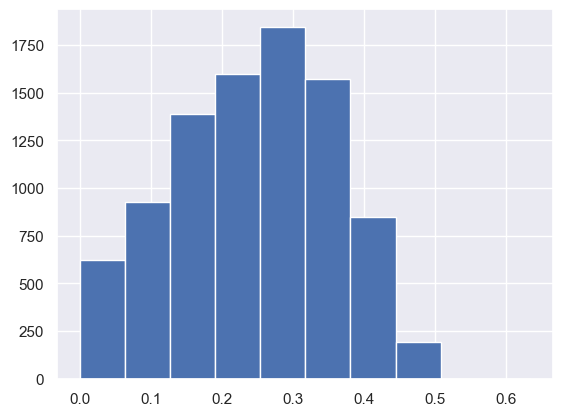

In [34]:
plt.hist(y_hat_probs)
plt.show()

In [35]:
# count the number of probabilities greater than 0.8
(y_hat_probs > 0.8).sum()

0

There are zero observations that are above that threshold meaning if we set 0.8 as the threshold the predictions will always come back no default. This would make the recall very low due to the fact that i never predicts the actual defaults. 

In [36]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)

We should use the 0.3 threshold to avoid to many false negatives. 

In [48]:
df_predictions = pd.DataFrame({'y_test':y_test, 
                               'y_hat':y_hat,
                               'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30,
                               'y_hat_60':y_hat_60})

## Logistic Report Function

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled

In [55]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = -0.01
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


I do not trust these forecasts because the model has low precision meaning of all the times it predicted positive it was incorrect the entire time. In addition the model only made 3 positive predictions anyway and got htem all wrong. The recall is 0 meaning the model didn't predict any of the actual positive cases correctly and there were 1989 positive cases. The F1 score confirms the low precision and recall. According to the MCC score the model is not doing any better than random chance. 

The model is biased to predicting negative due to the imbalance in the data.

In [56]:
my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.66
Precision = 0.32
Recall    = 0.51
f1_score  = 0.39
MCC       = 0.18
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4900,2111
Actual : positive,983,1006


The accuracy went down but the Precision, Recall, f1_score, and MCC all went up. This is a good thing because in this model we are more concerned with predicting when someone will default. 

This is consistent with my answers in question 6

## ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.653


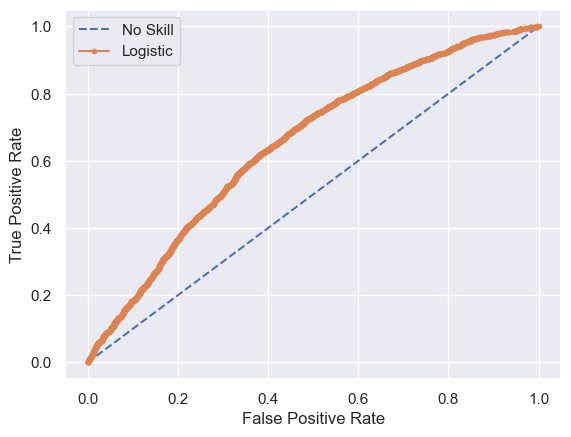

In [57]:


# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))] # A list of predictions for a "no skill" model, which predicts every observation as the majority class.
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs) # false positive rate, true positive rate, thresholds 
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Technically it is doing better than a no skill model but not by a huge amount.

## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [61]:
accuracy_CV5  = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
accuracy_CV5

array([0.77904762, 0.77880952, 0.77880952, 0.77857143, 0.77857143])

In [64]:
accuracy_CV10  = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )
accuracy_CV10

array([0.77952381, 0.77904762, 0.77904762, 0.77857143, 0.77857143,
       0.77857143, 0.77857143, 0.77857143, 0.77857143, 0.77857143])

These numbers are close to the original accuracy. I believe this is due to the fact that the data is imbalanced this means that no matter what subsection of data you select the majority of data points will be no default.